In [54]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns    
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [55]:
data = pd.read_csv('Vodafone_Customer_Churn_Sample_Dataset.csv')

# Data Exploration

In [56]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [58]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

7043 entries with as many unique customerIDs. That means there are no duplicate customerIDs.

3 numerical features - Tenure, MonthlyCharges, and TotalCharges 
16 categorical features - 6 of them binary and  10 of them with 3 or 4 categories.
Target variable Churn is binary - Yes or No


## Exploring numerical variables

Quick check to see what the values of tenure are like:

In [59]:
data['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [60]:
data['TotalCharges'].dtype

dtype('O')

TotalCharges is being read as an object for some reason. Converting it to numeric.

In [61]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].dtype

dtype('float64')

Quick check on the distribution of the numerical variables.

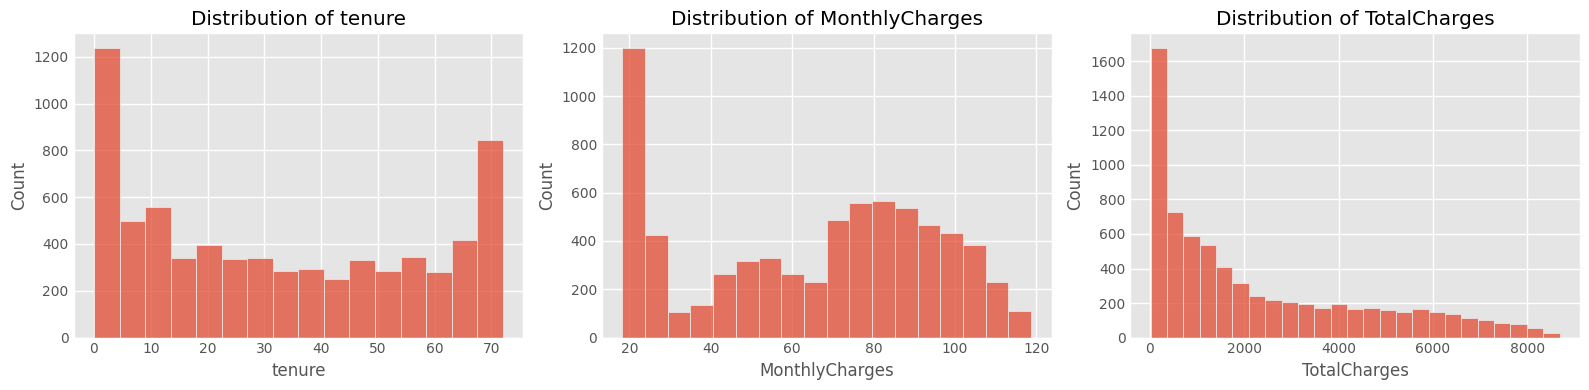

In [62]:
 
fig, axes = plt.subplots(1,3, figsize=(16, 4))

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges'] 

for i, feature in enumerate(numeric_cols):
    sns.histplot(data[feature], ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

- Highest proportion of customers are new (tenure of less than 5 months) but also a significant number of customers with long tenures (more than 65 months).
- Monthly charges follow a somewhat bimodal distribution with high number of customers paying less than 30 and also a sizeable proportion of customers paying around 80.
- Total charges is right skewed with most customers paying total of less than 500, and a long tail with some outliers paying up to 8000 and more

Quick check on the box plot as well to see the outliers.

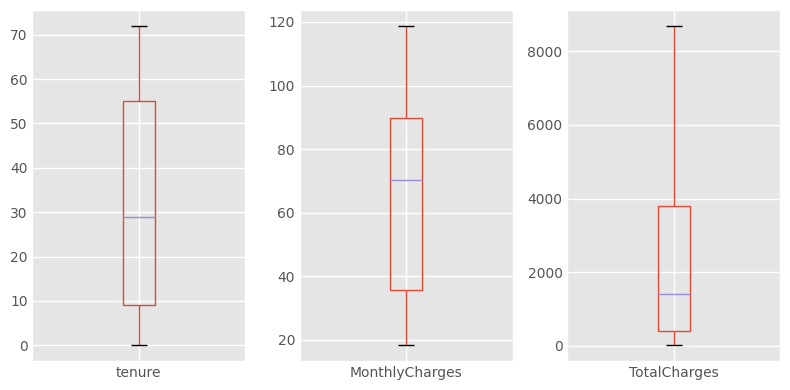

In [63]:
num_features = [ 'tenure',  'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1,3, figsize=(8, 4))
axes = axes.flatten()

for idx, feature in enumerate(num_features):
    ax = axes[idx]
    data.boxplot(column=feature, ax=ax)
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

TotalCharges does have some outliers, but they are not too extreme. We also don't want to miss any customer (later on we might want to get churn risk for every customer) so we don't drop the outliers.

## Exploring categorial variables

<Axes: xlabel='gender', ylabel='count'>

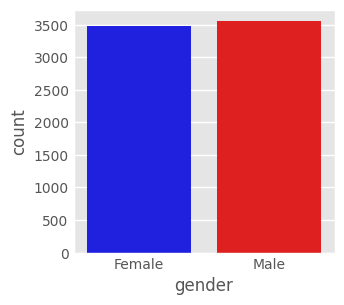

In [93]:
plt.figure(figsize=(3,3))
sns.countplot(data=data, x='gender', palette={"Female": "blue", "Male": "red"})


Gender is balanced. Almost equal distribution.

<Axes: xlabel='SeniorCitizen', ylabel='count'>

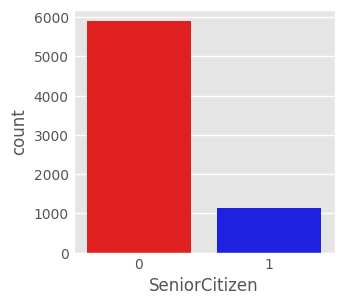

In [90]:
plt.figure(figsize=(3,3))
sns.countplot(data=data, x='SeniorCitizen', palette={"1": "blue", "0": "red"})


Much fewer Senior Citizens than non-Senior Citizens. Good to know at this stage.

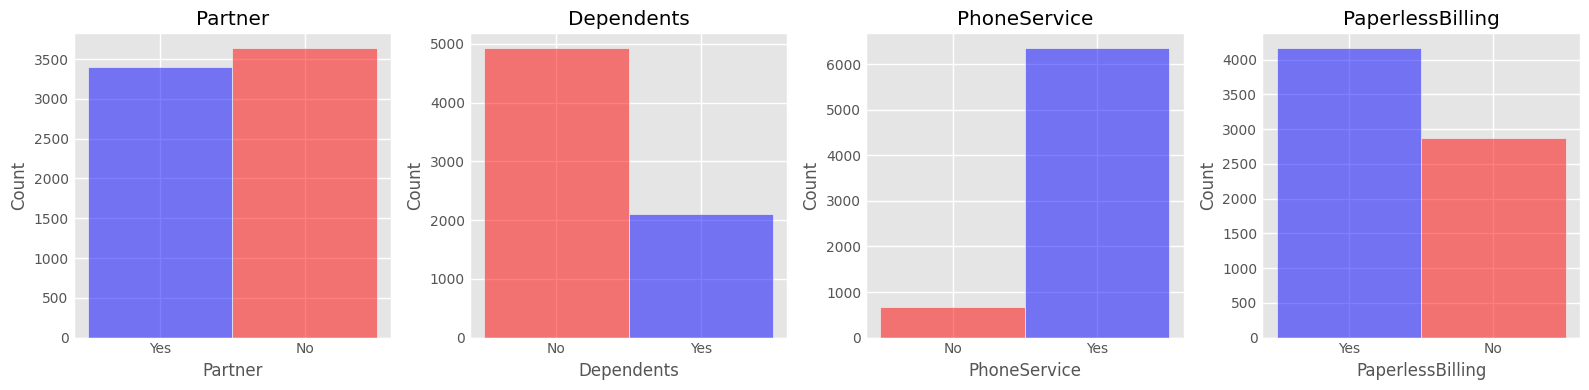

In [92]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes = axes.flatten()


custom_palette = {"Yes": "blue", "No": "red"}

for idx, feature in enumerate(['Partner', 'Dependents', 'PhoneService','PaperlessBilling']):
    sns.histplot(
        data=data,
        x=feature,
        hue=feature,              
        discrete=True,
        palette=custom_palette,
        ax=axes[idx],
        legend=False               
    )
    
    axes[idx].set_title(feature)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel("Count")

plt.tight_layout()
plt.show()

Equal proportion of customers with and without partners.

More customers without dependents than with dependents.

Most customers have a Phone service.

More customers have paperless billing than not but not by a big margin.


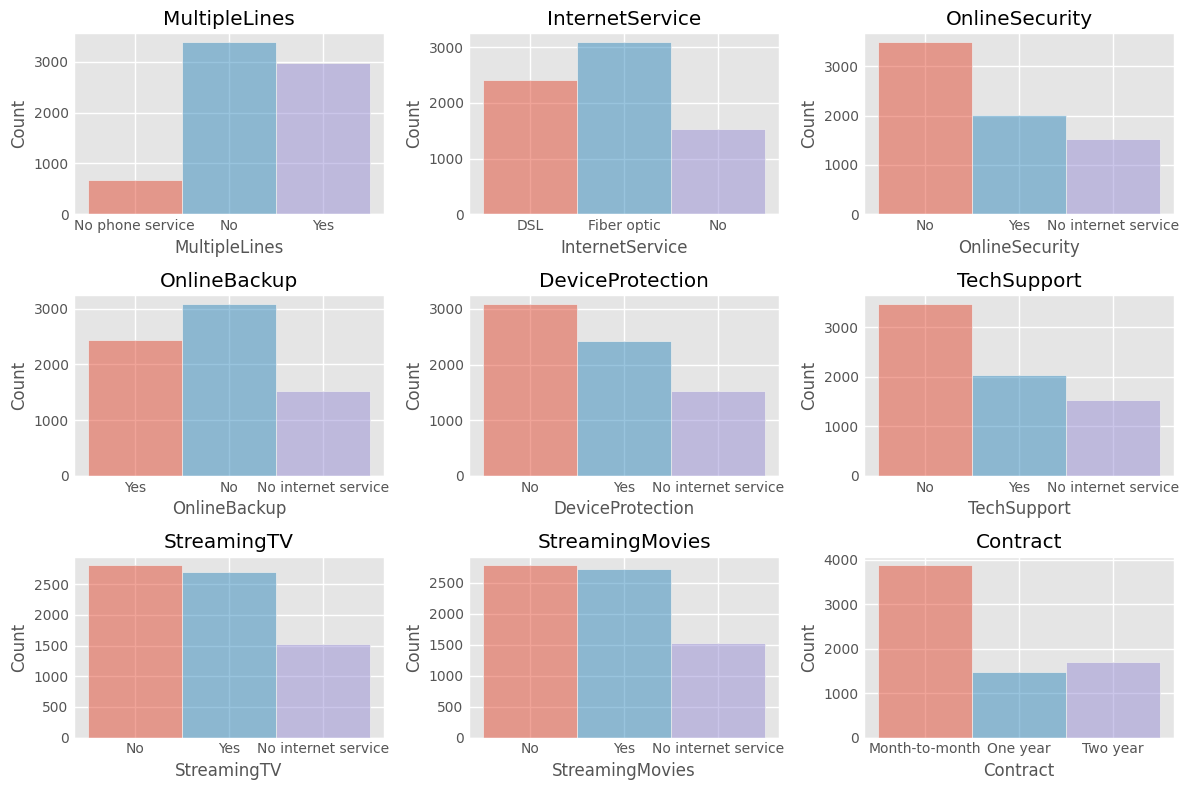

In [97]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.flatten()


# custom_palette = {"Yes": "blue", "No": "red"}

for idx, feature in enumerate(['MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'Contract']):
    sns.histplot(
        data=data,
        x=feature,
        hue=feature,              
        discrete=True,
        # palette=custom_palette,
        ax=axes[idx],
        legend=False               
    )
    axes[idx].set_title(feature)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel("Count")

plt.tight_layout()
plt.show()

Almost equal distribution of customers with and without multiple lines.

Among customers with internet service, there are
- More who have with Fiber optic internet than DSL
- More who have **not** opted for online security, online backup, device protection, tech support than those who have
- Slightly more who have **not** opted for streaming TV and Streaming movies than those who have, but only slightly
  
More customers are on month-to-month contracts than one or two year contracts.


<Axes: xlabel='PaymentMethod', ylabel='count'>

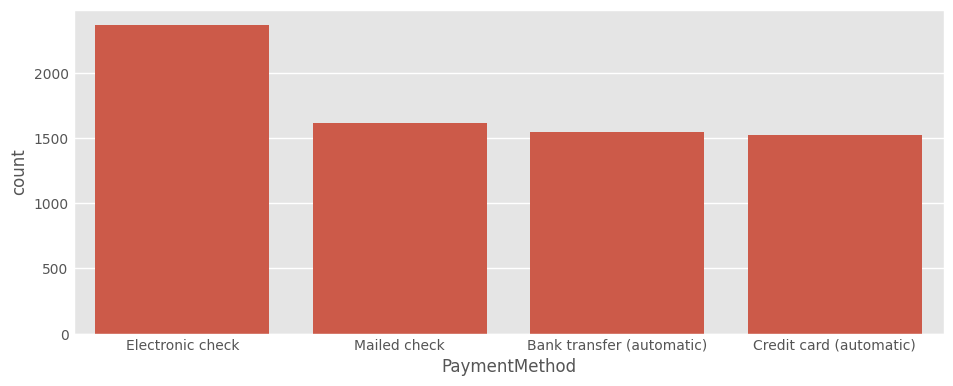

In [99]:
plt.figure(figsize=(10,4))
sns.countplot(data=data, x='PaymentMethod')


The most popular payment method is Electronic check, followed by Mailed check, Bank transfer (automatic) and Credit card (automatic), although the last 3 are very close to each other.

<Axes: xlabel='Churn', ylabel='count'>

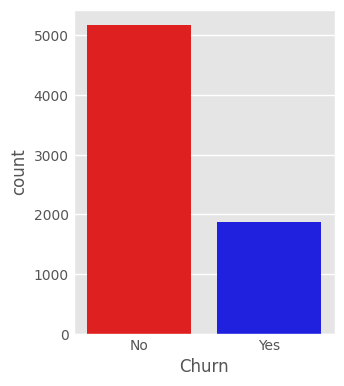

In [100]:
plt.figure(figsize=(3,4))
sns.countplot(data=data, x='Churn', palette = {"Yes": "blue", "No": "red"})



In [70]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

This is significant. The dataset has much fewer cases of churn (1869) than no churn (5174). This means that the target variable is imbalanced and should be accounted for in model building.

In [71]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Quick check on the distribution of the numerical variables.

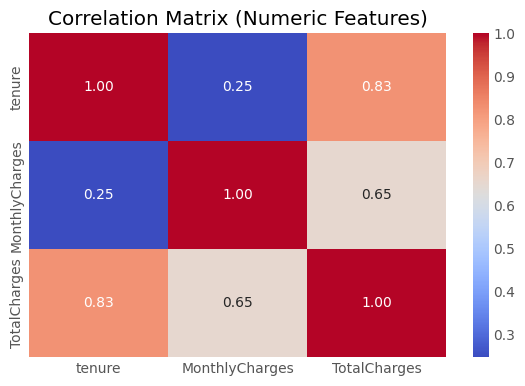

In [72]:

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

corr = data[numeric_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

Tenure is highly correlated with TotalCharges (makes sense, the longer the customer stays, the more they pay in total).
MonthlyCharges is slightly correlated with TotalCharges (also makes sense, the more they pay monthly, the more they pay in total).

In [73]:
binary_cols = ['SeniorCitizen','Partner','Dependents','PhoneService','PaperlessBilling','Churn',
        ]

multi_cat_cols = ['MultipleLines','InternetService','Contract','PaymentMethod','OnlineSecurity','OnlineBackup','DeviceProtection',
        'TechSupport','StreamingTV','StreamingMovies']

for col in binary_cols+multi_cat_cols:
    print(f"Unique values for {col}: {data[col].unique()})")


Unique values for SeniorCitizen: [0 1])
Unique values for Partner: ['Yes' 'No'])
Unique values for Dependents: ['No' 'Yes'])
Unique values for PhoneService: ['No' 'Yes'])
Unique values for PaperlessBilling: ['Yes' 'No'])
Unique values for Churn: ['No' 'Yes'])
Unique values for MultipleLines: ['No phone service' 'No' 'Yes'])
Unique values for InternetService: ['DSL' 'Fiber optic' 'No'])
Unique values for Contract: ['Month-to-month' 'One year' 'Two year'])
Unique values for PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'])
Unique values for OnlineSecurity: ['No' 'Yes' 'No internet service'])
Unique values for OnlineBackup: ['Yes' 'No' 'No internet service'])
Unique values for DeviceProtection: ['No' 'Yes' 'No internet service'])
Unique values for TechSupport: ['No' 'Yes' 'No internet service'])
Unique values for StreamingTV: ['No' 'Yes' 'No internet service'])
Unique values for StreamingMovies: ['No' 'Yes' 'No internet service'])


In [74]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Feature Engineering

In [75]:
df = data.copy()

In [76]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 null values for TotalCharges. This has to be dealt with before modeling. Quick look at these rows.


In [77]:
df[df['TotalCharges'].isnull()][['MonthlyCharges','tenure','TotalCharges']]

,MonthlyCharges,tenure,TotalCharges
488,52.55,0,NaN
753,20.25,0,NaN
936,80.85,0,NaN
1082,25.75,0,NaN
1340,56.05,0,NaN
3331,19.85,0,NaN
3826,25.35,0,NaN
4380,20.00,0,NaN
5218,19.70,0,NaN
6670,73.35,0,NaN


I suspected that these are customers with tenure of 0, i.e. new customers who have not been charged anything yet. 
Normally we drop these rows but we don't want to lose these customers as they might be at high risk of churn and we still want to classify them.
Another option is imputation but a simpler way is to set the TotalCharges for these as 0, as they may not have been charged anything yet due to their new billing cycle being yet to start.

In [78]:
df.loc[df['tenure']==0, 'TotalCharges'] = 0
df[df['tenure']==0][['MonthlyCharges','tenure','TotalCharges']]

,MonthlyCharges,tenure,TotalCharges
488,52.55,0,0.0
753,20.25,0,0.0
936,80.85,0,0.0
1082,25.75,0,0.0
1340,56.05,0,0.0
3331,19.85,0,0.0
3826,25.35,0,0.0
4380,20.00,0,0.0
5218,19.70,0,0.0
6670,73.35,0,0.0


Encoding the binary variables as 1 or 0

In [79]:
df.gender = df.gender.replace({'Female':1,'Male':0})
binary_cols = ['SeniorCitizen','Partner','Dependents','PhoneService','PaperlessBilling','Churn',
               ]

for col in binary_cols:
    df[col] = df[col].replace({'Yes':1, 'No':0})


One-hot encoding the categorical variables with more than 2 categories

In [80]:
multi_cat_cols = ['MultipleLines','InternetService','Contract','PaymentMethod','OnlineSecurity','OnlineBackup','DeviceProtection',
               'TechSupport','StreamingTV','StreamingMovies']

df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

In [81]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')

CustomerID is not useful for prediction, but it is needed to map back the predicted churn risk later on to each customer.
For exploration and checking correlations it is not useful, so we will drop it now.

In [82]:
df = df.drop('customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,1,0,1,0,1,29.85,29.85,0,...,False,True,False,False,False,False,False,False,False,False
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,True,False,False,False,False,False,False
2,0,0,0,0,2,1,1,53.85,108.15,1,...,False,True,False,False,False,False,False,False,False,False
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,False,False,False,True,False,True,False,False,False,False
4,1,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,False,False


In [83]:
import plotly.express as px
import pandas as pd

In [84]:
corr = df.corr()

fig = px.imshow(corr, text_auto=False, aspect="auto", height=800)

fig.update_traces(hovertemplate='Correlation: %{z:.2f}')

fig.update_layout(xaxis_side="top")

fig.show()

Some of the one-hot encoded categorical variables are 100% correlated (redundant) with each other (e.g. InternetService_No and OnlineBackup_No internet service etc.)
So we should remove the redundance ones among these to avoid multicollinearity before modeling.
- PhoneService vs MultipleLines: So drop PhoneService (since MultipleLines contains that info already).
- InternetService_No vs all _No internet service dummies: So drop the _No internet service columns (since InternetService_No already captures that condition).

